In [49]:
import pandas as pd

In [50]:
gamesdf = pd.read_csv('../../data/games.csv')

In [51]:
gamesdf.head()

,Unnamed: 0,content.link,date,gameDate,gamePk,gameType,link,season,status.abstractGameState,status.codedGameState,...,teams.home.leagueRecord.type,teams.home.leagueRecord.wins,teams.home.score,teams.home.team.id,teams.home.team.link,teams.home.team.name,totalGames,venue.id,venue.link,venue.name
0,0,/api/v1/game/2016020559/content,2017-01-01,2017-01-01T20:30:00Z,2016020559,R,/api/v1/game/2016020559/feed/live,20162017,Final,7,...,league,17,5,10,/api/v1/teams/10,Toronto Maple Leafs,3,NaN,/api/v1/venues/null,Exhibition Stadium
1,1,/api/v1/game/2016020560/content,2017-01-01,2017-01-02T00:30:00Z,2016020560,R,/api/v1/game/2016020560/feed/live,20162017,Final,7,...,league,22,2,15,/api/v1/teams/15,Washington Capitals,3,NaN,/api/v1/venues/null,Verizon Center
2,2,/api/v1/game/2016020561/content,2017-01-01,2017-01-02T01:00:00Z,2016020561,R,/api/v1/game/2016020561/feed/live,20162017,Final,7,...,league,19,4,24,/api/v1/teams/24,Anaheim Ducks,3,5046.0,/api/v1/venues/5046,Honda Center
3,3,/api/v1/game/2016020562/content,2017-01-02,2017-01-02T18:00:00Z,2016020562,R,/api/v1/game/2016020562/feed/live,20162017,Final,7,...,league,20,4,19,/api/v1/teams/19,St. Louis Blues,3,2889.0,/api/v1/venues/2889,Busch Stadium
4,4,/api/v1/game/2016020563/content,2017-01-02,2017-01-03T00:00:00Z,2016020563,R,/api/v1/game/2016020563/feed/live,20162017,Final,7,...,league,15,3,1,/api/v1/teams/1,New Jersey Devils,3,NaN,/api/v1/venues/null,Prudential Center


In [91]:
gamesdf.describe(include='all')

,Unnamed: 0,content.link,date,gameDate,gamePk,gameType,link,season,status.abstractGameState,status.codedGameState,...,teams.home.leagueRecord.type,teams.home.leagueRecord.wins,teams.home.score,teams.home.team.id,teams.home.team.link,teams.home.team.name,totalGames,venue.id,venue.link,venue.name
count,602.000000,602,602,602,6.020000e+02,602,602,602.0,602,602.000000,...,602,602.000000,602.000000,602.000000,602,602,602.000000,480.000000,602,602
unique,NaN,602,87,374,NaN,2,602,NaN,1,NaN,...,1,NaN,NaN,NaN,32,32,NaN,NaN,27,33
top,NaN,/api/v1/game/2016021008/content,2017-01-31,2017-03-25T23:00:00Z,NaN,R,/api/v1/game/2016020704/feed/live,NaN,Final,NaN,...,league,NaN,NaN,NaN,/api/v1/teams/1,New Jersey Devils,NaN,NaN,/api/v1/venues/null,STAPLES Center
freq,NaN,1,14,7,NaN,599,1,NaN,602,NaN,...,602,NaN,NaN,NaN,23,23,NaN,NaN,122,24
mean,300.500000,NaN,NaN,NaN,2.016021e+09,NaN,NaN,20162017.0,NaN,6.995017,...,NaN,28.669435,2.953488,18.323920,NaN,NaN,8.498339,5051.145833,NaN,NaN
std,173.926709,NaN,NaN,NaN,1.403648e+03,NaN,NaN,0.0,NaN,0.070476,...,NaN,8.346811,1.710639,13.519188,NaN,NaN,3.150284,102.495968,NaN,NaN
min,0.000000,NaN,NaN,NaN,2.016020e+09,NaN,NaN,20162017.0,NaN,6.000000,...,NaN,0.000000,0.000000,1.000000,NaN,NaN,1.000000,2889.000000,NaN,NaN
25%,150.250000,NaN,NaN,NaN,2.016021e+09,NaN,NaN,20162017.0,NaN,7.000000,...,NaN,22.000000,2.000000,8.000000,NaN,NaN,6.000000,5031.000000,NaN,NaN
50%,300.500000,NaN,NaN,NaN,2.016021e+09,NaN,NaN,20162017.0,NaN,7.000000,...,NaN,28.000000,3.000000,17.000000,NaN,NaN,9.000000,5054.000000,NaN,NaN
75%,450.750000,NaN,NaN,NaN,2.016021e+09,NaN,NaN,20162017.0,NaN,7.000000,...,NaN,35.000000,4.000000,24.000000,NaN,NaN,11.000000,5081.000000,NaN,NaN


In [62]:
columns = ['date','season', 'teams.away.leagueRecord.losses', 'teams.away.leagueRecord.ot','teams.away.leagueRecord.wins', 'teams.away.score', 'teams.away.team.id', 'teams.home.leagueRecord.losses', 'teams.home.leagueRecord.ot', 'teams.home.leagueRecord.wins', 'teams.home.score', 'teams.home.team.id']

col_names = ['date','season', 'away_losses', 'away_ot', 'away_wins', 'away_score', 'away_id', 'home_losses', 'home_ot', 'home_wins', 'home_score', 'hometeam_id']

games = gamesdf[columns]
games.columns = col_names

games['away_gp'] = games['away_ot'] + games['away_wins'] + games['away_losses']
games['home_gp'] = games['home_ot'] + games['home_wins'] + games['home_losses']

games['away_points'] = games['away_ot'] + (games['away_wins']*2)
games['home_points'] = games['home_ot'] + (games['home_wins']*2)

games['away_ppg'] = games['away_points'] / games['away_gp']
games['home_ppg'] = games['home_points'] / games['home_gp']

games['home_vs_away_points_diffppg'] = games['home_ppg'] - games['away_ppg']

games['home_win'] = (games['home_score'] - games['away_score']> 0).astype('int')

games.dropna(subset = ['home_vs_away_points_diffppg'], inplace = True)

C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [63]:
games.head()

,date,season,away_losses,away_ot,away_wins,away_score,away_id,home_losses,home_ot,home_wins,home_score,hometeam_id,away_gp,home_gp,away_points,home_points,away_ppg,home_ppg,home_vs_away_points_diffppg,home_win
0,2017-01-01,20162017,16,5.0,16,4,17,12,7.0,17,5,10,37.0,36.0,37.0,41.0,1.000000,1.138889,0.138889,1
1,2017-01-01,20162017,13,4.0,20,1,9,9,5.0,22,2,15,37.0,36.0,44.0,49.0,1.189189,1.361111,0.171922,1
2,2017-01-01,20162017,14,5.0,20,3,4,12,8.0,19,4,24,39.0,39.0,45.0,46.0,1.153846,1.179487,0.025641,1
3,2017-01-02,20162017,12,5.0,23,1,16,13,5.0,20,4,19,40.0,38.0,51.0,45.0,1.275000,1.184211,-0.090789,1
4,2017-01-02,20162017,16,4.0,20,0,6,16,7.0,15,3,1,40.0,38.0,44.0,37.0,1.100000,0.973684,-0.126316,1


In [64]:
games.to_csv('../../data/games2.csv')

In [66]:
Y = games[['home_win']]
X = games[['home_vs_away_points_diffppg']]

In [89]:
# pour connaitre notre benchmark
Y.mean()

home_win    0.54424
dtype: float64

In [74]:

import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.647089
         Iterations 5
                            Results: Logit
Model:                  Logit              Pseudo R-squared:   0.061   
Dependent Variable:     home_win           AIC:                777.2123
Date:                   2020-05-05 00:09   BIC:                781.6075
No. Observations:       599                Log-Likelihood:     -387.61 
Df Model:               0                  LL-Null:            -412.85 
Df Residuals:           598                LLR p-value:        nan     
Converged:              1.0000             Scale:              1.0000  
No. Iterations:         5.0000                                         
-----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------
home_vs_away_points_diffppg 2.4096   0.3456 6.9715 0.0000 1.732

In [79]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=123)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[25 28]
 [26 41]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48        53
           1       0.59      0.61      0.60        67

    accuracy                           0.55       120
   macro avg       0.54      0.54      0.54       120
weighted avg       0.55      0.55      0.55       120



In [72]:
import statsmodels.api as sm
print(result.summary2())

AttributeError: 'LogisticRegression' object has no attribute 'summary2'

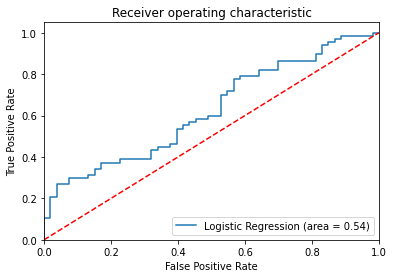

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()